In [2]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [135]:
pip install networkx geopandas

Note: you may need to restart the kernel to use updated packages.


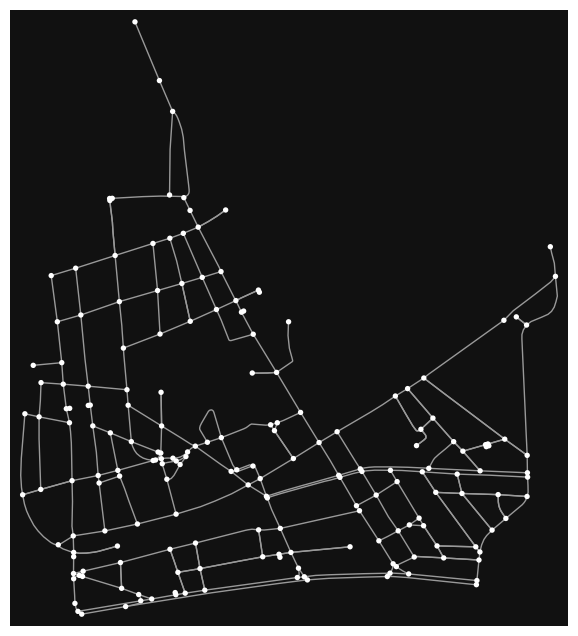

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [28]:
import osmnx as ox

cidade = "Centro, Maceió, Alagoas, Brasil"

grafo = ox.graph_from_place(cidade, network_type='drive')

ox.plot_graph(grafo)

[(430590280, 431009226), (430590280, 2615314032), (430590284, 2574513689), (431009226, 2621538032), (1395173404, 2615314032), (1395173404, 2574513689)]


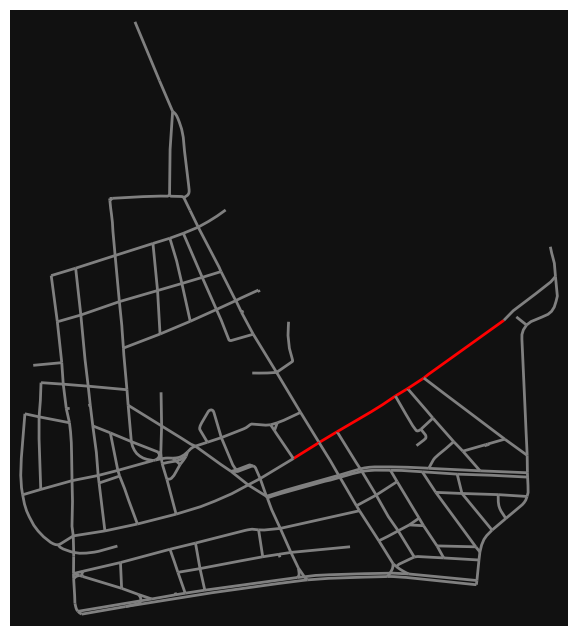

In [134]:
cidade = "Centro, Maceió, Alagoas, Brasil"
grafo = ox.graph_from_place(cidade, network_type='drive')

# Converte para grafo não direcionado (opcional, facilita)
G = grafo.to_undirected()

# Arestas que você quer destacar (exemplo: pega 5 primeiras arestas do grafo)
arestas_destaque = []
arestas_destaque.append(list(G.edges())[3])
arestas_destaque.append(list(G.edges())[5])
arestas_destaque.append(list(G.edges())[6])
arestas_destaque.append(list(G.edges())[64])
arestas_destaque.append(list(G.edges())[230])
arestas_destaque.append(list(G.edges())[232])
print(arestas_destaque)

# Define as cores: vermelho para as destacadas, cinza para o resto
edge_colors = ['red' if edge in arestas_destaque or (edge[1], edge[0]) in arestas_destaque else 'gray' for edge in G.edges()]

# Plota o grafo
fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=2, node_size=0)

In [112]:
nodes, edges = ox.graph_to_gdfs(grafo.to_undirected())

nodes_df = nodes.reset_index()
edges_df = edges.reset_index()

In [129]:
print(edges_df[edges_df["name"] == "Rua Barão de Atalaia"])

              u           v  key      osmid    highway lanes  \
3     430590280   431009226    0  268482733  secondary     2   
5     430590280  2615314032    0  268482733  secondary     2   
6     430590284  2574513689    0  866902688  secondary     2   
64    431009226  2621538032    0   49263257  secondary     2   
230  1395173404  2615314032    0  268482733  secondary     2   
232  1395173404  2574513689    0  268482733  secondary     2   

                     name  oneway  reversed      length  \
3    Rua Barão de Atalaia    True     False   62.610875   
5    Rua Barão de Atalaia    True     False  203.517033   
6    Rua Barão de Atalaia    True     False  293.979111   
64   Rua Barão de Atalaia    True     False   90.140193   
230  Rua Barão de Atalaia    True     False   42.591247   
232  Rua Barão de Atalaia    True     False   57.634917   

                                              geometry  ref maxspeed access  
3    LINESTRING (-35.73473 -9.66577, -35.73522 -9.6...  NaN

In [111]:
nodes_df = nodes_df[nodes_df["street_count"] > 1]

print(nodes_df)

           osmid         y          x  street_count highway  \
0      338744483 -9.670583 -35.741767             4     NaN   
1      430590280 -9.665773 -35.734727             3     NaN   
2      430590284 -9.662790 -35.730197             3     NaN   
3      430888008 -9.669120 -35.741883             3     NaN   
4      430888009 -9.670658 -35.741664             3     NaN   
..           ...       ...        ...           ...     ...   
183   8978481526 -9.659582 -35.740899             3     NaN   
184   8980077899 -9.666793 -35.737453             3     NaN   
186   9034345369 -9.669055 -35.736306             3     NaN   
187  12626168576 -9.666102 -35.730632             3     NaN   
190  12856081673 -9.670138 -35.739108             3     NaN   

                       geometry  
0    POINT (-35.74177 -9.67058)  
1    POINT (-35.73473 -9.66577)  
2     POINT (-35.7302 -9.66279)  
3    POINT (-35.74188 -9.66912)  
4    POINT (-35.74166 -9.67066)  
..                          ...  
183  

In [121]:
vertices = list(nodes_df["osmid"])
num_streets = list(nodes_df["street_count"])

print("Número de vértices:", len(vertices))
print("Primeiros 5 vértices:", vertices[:5])
print("Primeiros 5 numeros de ruas nos vértices:", num_streets[:5])

Número de vértices: 191
Primeiros 5 vértices: [338744483, 430590280, 430590284, 430888008, 430888009]
Primeiros 5 numeros de ruas nos vértices: [4, 3, 3, 3, 3]


In [115]:
def get_index_list(arr: list, value):

    for i in range(len(arr)):
        if arr[i] == value:
            return i

    return -1

In [116]:
arestas = []

for i in range(len(edges_df)):
    arestas.append( (int(edges_df['u'][i]), int(edges_df['v'][i]), int(edges_df['length'][i])))


In [106]:
print("Número de arestas:", len(arestas))
print("Primeiras 5 arestas:", arestas[:5])

Número de arestas: 283
Primeiras 5 arestas: [(338744483, 430888009), (338744483, 2657811214), (338744483, 2657811215), (430590280, 431009226), (430590280, 5998668919)]


In [123]:
# Salvar no .txt
with open("input/data2.txt", "w") as f:
    
    n = len(vertices)
    m = len(arestas)
    f.write(f"{n} {m}\n")

    for n in num_streets:
        f.write(f"{n}\n")

    for u, v, w in arestas:
        v1 = get_index_list(vertices, u)
        v2 = get_index_list(vertices, v)


        if (v1 != -1 and v2 != -1):
            f.write(f"{v1} {v2} {w}\n")
    

In [124]:
vertices_cobertura = []
with open("output/out2.txt", "r") as arquivo:
       for linha in arquivo:
           try:
               numero = int(linha.strip())
               print(numero)
               vertices_cobertura.append(vertices[numero])
           except ValueError:
               print(f"A linha '{linha.strip()}' não pode ser convertida para inteiro.")


node_colors = ['red' if node in vertices_cobertura else 'gray' for node in grafo.nodes()]


0
5
8
9
12
14
16
18
19
23
24
26
32
36
40
46
47
51
52
54
58
59
63
64
68
71
79
83
88
90
93
96
97
105
109
110
124
130
132
133
141
144
153
155
158
162
169
170
172
173
175
183
186
187
190


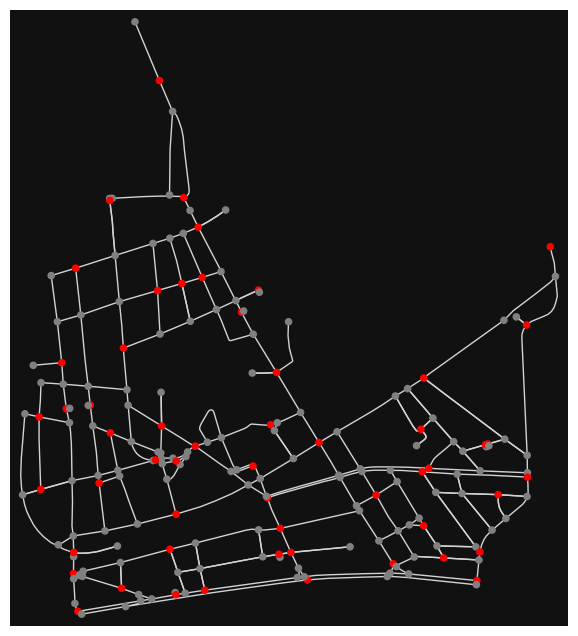

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [125]:
ox.plot_graph(grafo, node_color=node_colors, node_size=30, edge_color="lightgray")